# 기술통계   

## 대표값 - 평균

In [1]:
import numpy as np

data = [10, 20, 30, 40, 50]
mean_value = np.mean(data)
print(mean_value)  # 30.0

30.0


In [3]:
# 기하평균
from scipy.stats import hmean, gmean
gmean_value = gmean(data)
print(gmean_value)

26.051710846973528


In [5]:
# 조화평균
hmean_value  = hmean(data)
print(hmean_value)

21.8978102189781


In [12]:
# 가중평균
# 가격과 개수 
prices = [5000, 9000]
counts = [8,2]

weight_average = np.average(prices, weights= counts)
print(weight_average)

5800.0


## 대표값 - 중앙값

In [9]:
data

[10, 20, 30, 40, 50]

### 백분위수

In [ ]:
import numpy as np

# scores = [65, 75, 80, 85, 95]
scores = [15, 75, 80, 85, 95] # 극단적인 작은값
p25 = np.percentile(scores, 25) #01
p50 = np.percentile(scores, 50) #02 median
p75 = np.percentile(scores, 75) #03

p25, p50, p75

75.0 80.0 85.0


(np.float64(75.0), np.float64(80.0), np.float64(85.0), None)

In [22]:
# IQR : 사분위범위 Q3 - Q1 = 85- 75 = 10

p75 - p25 

np.float64(10.0)

중앙값, 분위수는 개수(위치)를 중요시하는 통계량
이상값/극단적인 값이 중요하지 않다.

## 대표값 - 최빈값

# 대표값 - 최빈값

In [23]:
import pandas as pd

data = pd.Series([1, 2, 2, 3, 3, 3, 4, 4])
mode_value = data.mode()
print(mode_value)  # 3 (가장 많이 등장한 값)

0    3
dtype: int64


# 변동(산포)

## 변동성

# 범위의 계산 > 변동성을 측정하는 일반 지표 > 극단적인 값에 민감

- 최대/최소 2개의 값만 사용
- 개별점수들이 다른 점수들과 얼마나 차이가 있나 X
- 실제 데이터가 어떤 값들로 구성되어 있는지를 설명할 수 없다.

In [25]:
data = [10, 20, 30, 40, 50]
range_value = max(data) - min(data)
print(range_value)  # 40

40


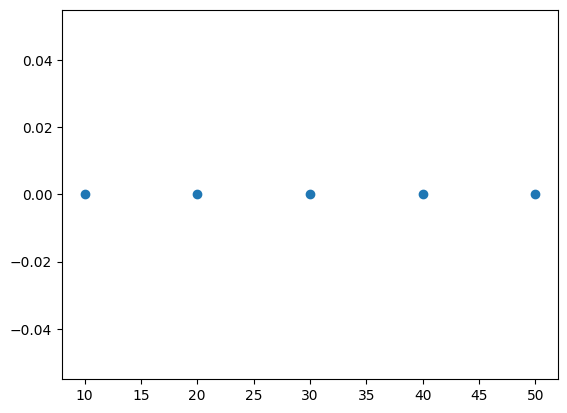

In [31]:
# 삼포도
import matplotlib.pyplot as plt
plt.scatter(data, np.zeros_like(data))

In [32]:
import seaborn as sns

vp_df = sns.load_dataset('iris')
vp_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# sepal_length 의 범위
vp_df['sepal_length'].max() - vp_df['sepal_length'].min()

np.float64(7.9)

In [36]:
# 모든 속성의 범위 찾기

for col in vp_df.columns:
    min_val = vp_df[col].min()
    max_val = vp_df[col].max()
    print(f'{col} 범위 : {min_val} ~ {max_val}')

sepal_length 범위 : 4.3 ~ 7.9
sepal_width 범위 : 2.0 ~ 4.4
petal_length 범위 : 1.0 ~ 6.9
petal_width 범위 : 0.1 ~ 2.5
species 범위 : setosa ~ virginica


In [39]:
for col in vp_df.columns:
    if pd.api.types.is_numeric_dtype(vp_df[col]):
        print(f'{col} 범위 : {vp_df[col].min()} ~ {vp_df[col].max()}')

sepal_length 범위 : 4.3 ~ 7.9
sepal_width 범위 : 2.0 ~ 4.4
petal_length 범위 : 1.0 ~ 6.9
petal_width 범위 : 0.1 ~ 2.5


변동성이 가장 큰 속성은 petal_length 이다.
petal_length와 petal_width가 sepal_length와 sepal_width보다 상대적으로 변동성이 크다

모델 생성시에 다루어야하는 속성으로 볼 수 있다.

In [ ]:
# 산포도로 변동성 확인하기
# petal_length와 petal_width 그리기

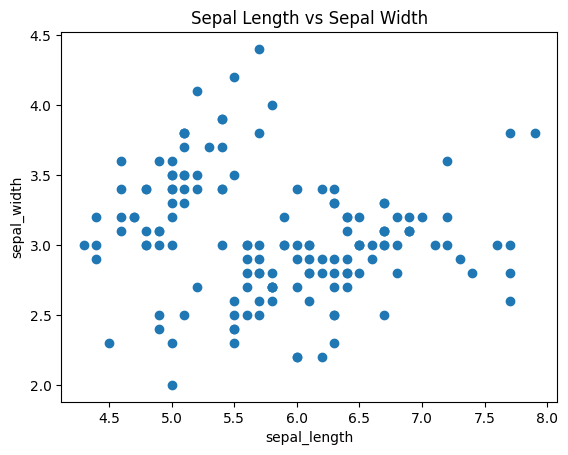

In [42]:
plt.scatter(vp_df['sepal_length'], vp_df['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Sepal Length vs Sepal Width')
plt.show()

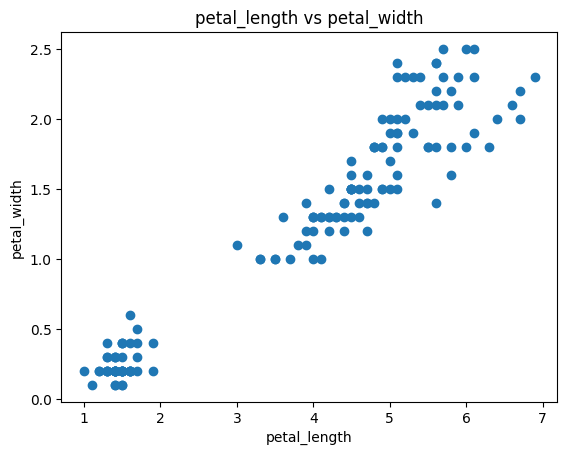

In [43]:
plt.scatter(vp_df['petal_length'], vp_df['petal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('petal_length vs petal_width')
plt.show()

분산과 표준편차

##  분산(Variance)

In [44]:
import numpy as np

data = [10, 20, 30, 40, 50]
variance_value = np.var(data)
print(variance_value)  # 200.0

200.0


# 표준편차(Standard Deviation) = SD

In [45]:
import numpy as np

std_dev = np.std(data)
print(std_dev)  # 14.14

14.142135623730951


In [ ]:
# sd의 비교
import numpy as np
import matplotlib.pyplot as plt

# 평균과 표준편차 설정
mu = 100 # 평균
sd1 = 10 # data1 표준편차
sd2 = 50 # data2 표준편차

# 정규분포 데이터 생성
data1 = np.random.normal(mu, sd1, 10000)
data2 = np.random.normal(mu, sd2, 10000)

In [51]:
bins = np.arange(0,240, 10)
bins

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230])

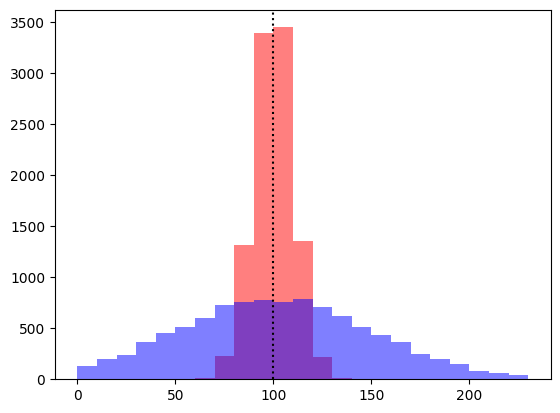

In [56]:
plt.hist(data1, bins=bins, color='red', alpha=0.5)
plt.hist(data2, bins=bins, color='blue', alpha=0.5)

# 평균선
plt.axvline(mu, color ='black', linestyle= ':')

In [57]:
vp_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
import statistics
vp_df['sepal_length'].mean()

(array([ 1.,  0.,  0.,  0.,  3.,  0.,  4.,  0.,  3.,  0.,  8.,  0.,  5.,
         0.,  9.,  0., 14.,  0., 10.,  0., 26.,  0., 11.,  0.,  0., 13.,
         0.,  6.,  0., 12.,  0.,  6.,  0.,  4.,  0.,  3.,  0.,  6.,  0.,
         2.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([2.   , 2.048, 2.096, 2.144, 2.192, 2.24 , 2.288, 2.336, 2.384,
        2.432, 2.48 , 2.528, 2.576, 2.624, 2.672, 2.72 , 2.768, 2.816,
        2.864, 2.912, 2.96 , 3.008, 3.056, 3.104, 3.152, 3.2  , 3.248,
        3.296, 3.344, 3.392, 3.44 , 3.488, 3.536, 3.584, 3.632, 3.68 ,
        3.728, 3.776, 3.824, 3.872, 3.92 , 3.968, 4.016, 4.064, 4.112,
        4.16 , 4.208, 4.256, 4.304, 4.352, 4.4  ]),
 <BarContainer object of 50 artists>)

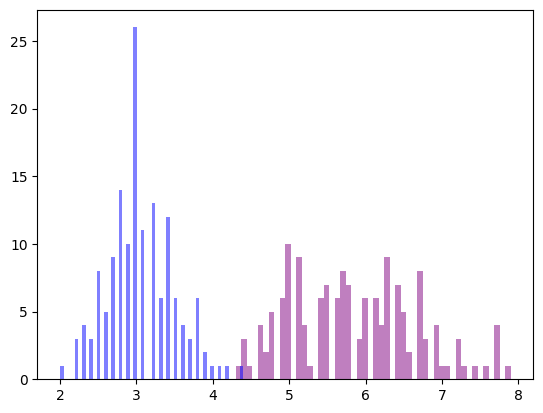

In [72]:
plt.hist(vp_df['sepal_length'],bins=50, color='purple', alpha = 0.5)
plt.hist(vp_df['sepal_width'],bins=50, color='blue', alpha = 0.5)

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

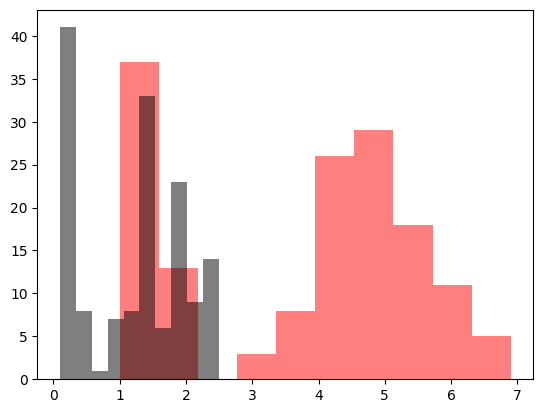

In [ ]:
plt.hist(vp_df['petal_length'], color='red', alpha = 0.5)
plt.hist(vp_df['petal_width'], color='black', alpha = 0.5)

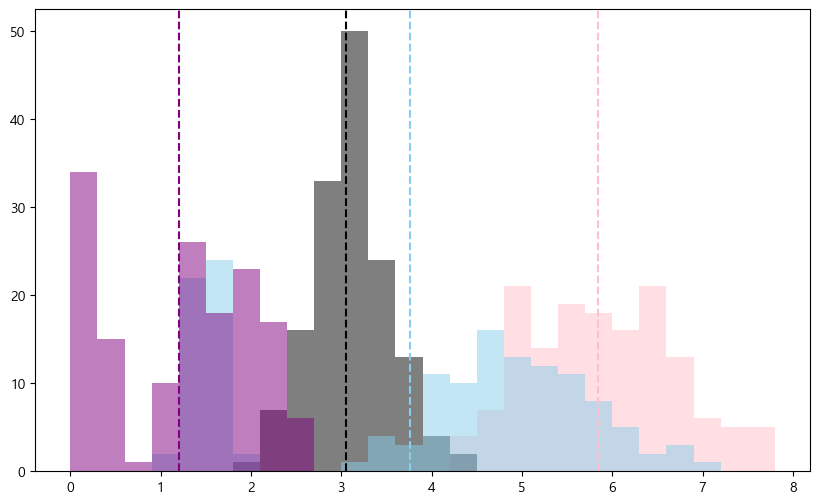

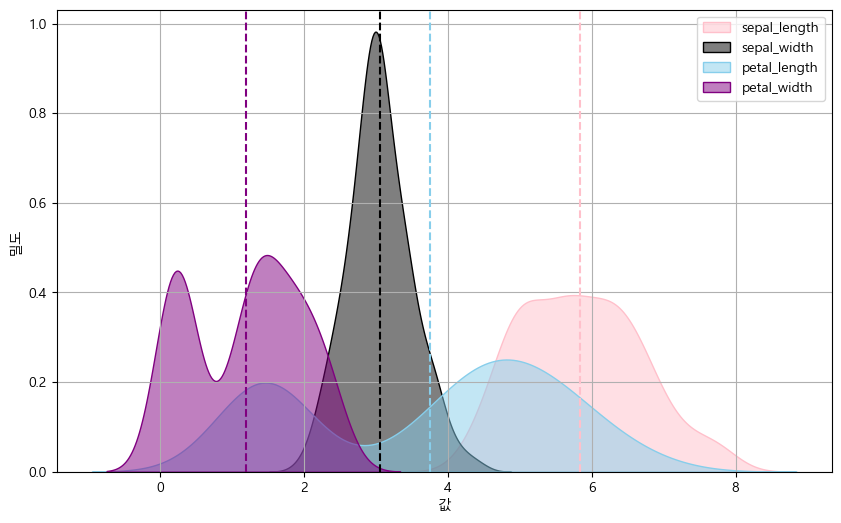

In [82]:
plt.figure(figsize=(10, 6))
bins = np.arange(0, 8, 0.3)

plt.hist(vp_df['sepal_length'], bins=bins, color='pink', alpha=0.5, label='sepal_length')
plt.hist(vp_df['sepal_width'], bins=bins, color='black', alpha=0.5, label='sepal_width')
plt.hist(vp_df['petal_length'], bins=bins, color='skyblue', alpha=0.5, label='petal_length')
plt.hist(vp_df['petal_width'], bins=bins, color='purple', alpha=0.5, label='petal_width')

plt.axvline(vp_df['sepal_length'].mean(), color='pink', linestyle='--')
plt.axvline(vp_df['sepal_width'].mean(), color='black', linestyle='--')
plt.axvline(vp_df['petal_length'].mean(), color='skyblue', linestyle='--')
plt.axvline(vp_df['petal_width'].mean(), color='purple', linestyle='--')

plt.figure(figsize=(10, 6))

sns.kdeplot(vp_df['sepal_length'], color='pink', fill=True, label='sepal_length', alpha=0.5)
sns.kdeplot(vp_df['sepal_width'], color='black', fill=True, label='sepal_width', alpha=0.5)
sns.kdeplot(vp_df['petal_length'], color='skyblue', fill=True, label='petal_length', alpha=0.5)
sns.kdeplot(vp_df['petal_width'], color='purple', fill=True, label='petal_width', alpha=0.5)

# 평균 위치 표시
plt.axvline(vp_df['sepal_length'].mean(), color='pink', linestyle='--')
plt.axvline(vp_df['sepal_width'].mean(), color='black', linestyle='--')
plt.axvline(vp_df['petal_length'].mean(), color='skyblue', linestyle='--')
plt.axvline(vp_df['petal_width'].mean(), color='purple', linestyle='--')

plt.xlabel("값")
plt.ylabel("밀도")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
bins = np.arange(0, 8, 0.3)

plt.hist(vp_df['sepal_length'], bins=bins, color='pink', alpha=0.5, label='sepal_length')
plt.hist(vp_df['sepal_width'], bins=bins, color='black', alpha=0.5, label='sepal_width')
plt.hist(vp_df['petal_length'], bins=bins, color='skyblue', alpha=0.5, label='petal_length')
plt.hist(vp_df['petal_width'], bins=bins, color='purple', alpha=0.5, label='petal_width')

plt.axvline(vp_df['sepal_length'].mean(), color='pink', linestyle='--')
plt.axvline(vp_df['sepal_width'].mean(), color='black', linestyle='--')
plt.axvline(vp_df['petal_length'].mean(), color='skyblue', linestyle='--')
plt.axvline(vp_df['petal_width'].mean(), color='purple', linestyle='--')

In [79]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 설정 (Windows 기본: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

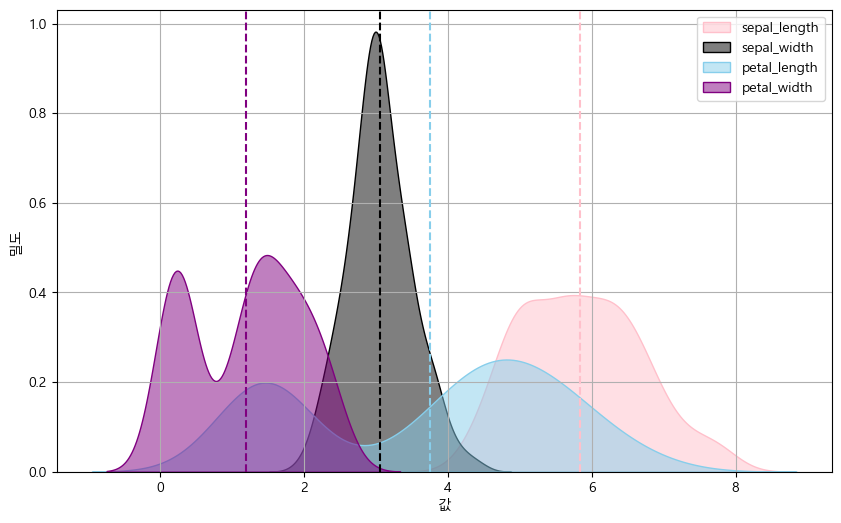

In [81]:
plt.figure(figsize=(10, 6))

sns.kdeplot(vp_df['sepal_length'], color='pink', fill=True, label='sepal_length', alpha=0.5)
sns.kdeplot(vp_df['sepal_width'], color='black', fill=True, label='sepal_width', alpha=0.5)
sns.kdeplot(vp_df['petal_length'], color='skyblue', fill=True, label='petal_length', alpha=0.5)
sns.kdeplot(vp_df['petal_width'], color='purple', fill=True, label='petal_width', alpha=0.5)

# 평균 위치 표시
plt.axvline(vp_df['sepal_length'].mean(), color='pink', linestyle='--')
plt.axvline(vp_df['sepal_width'].mean(), color='black', linestyle='--')
plt.axvline(vp_df['petal_length'].mean(), color='skyblue', linestyle='--')
plt.axvline(vp_df['petal_width'].mean(), color='purple', linestyle='--')

plt.xlabel("값")
plt.ylabel("밀도")
plt.legend()
plt.grid(True)
plt.show()

# 사분위수 범위

In [84]:
numeric_df = vp_df.select_dtypes(include=['float64', 'int'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

summ = pd.DataFrame({'Q1(1사분위수)' : Q1,
                     'Q3(3사분위수)' : Q3,
                     'IQR(사분위수 범위)' : IQR})
summ

,Q1(1사분위수),Q3(3사분위수),IQR(사분위수 범위)
sepal_length,5.1,6.4,1.3
sepal_width,2.8,3.3,0.5
petal_length,1.6,5.1,3.5
petal_width,0.3,1.8,1.5


가장 분산이 큰 변수 : petal_length

가장 분산이 작은 변수 : sepal_width

품종을 분류할 때, petal_length가 민감하게 작용할 것이다.
식별력이 크다.

**IQR > 이상치의 허용범위가 크다

# 분포의 모양, 형태   
   
- 모양이 정규분포인지
- 치우쳐져 있는가/ 좌/우, 위/아래
- 특이한 패턴이 있는가 / 쌍봉

### 빈도분포표(Frequency Distribution)

In [86]:
import pandas as pd
import numpy as np

# 데이터 입력
data = [
    [47, 10, 31, 25, 20],
    [2, 11, 31, 25, 21],
    [44, 14, 15, 26, 21],
    [41, 14, 16, 26, 21],
    [7, 30, 17, 27, 24],
    [6, 30, 16, 29, 24],
    [35, 32, 15, 29, 23],
    [38, 33, 19, 28, 20],
    [35, 34, 18, 29, 21],
    [36, 32, 16, 27, 20],
]

# DataFrame으로 변환
df = pd.DataFrame(data, columns=['A', 'B', 'C', 'D', 'E'])
df

,A,B,C,D,E
0,47,10,31,25,20
1,2,11,31,25,21
2,44,14,15,26,21
3,41,14,16,26,21
4,7,30,17,27,24
5,6,30,16,29,24
6,35,32,15,29,23
7,38,33,19,28,20
8,35,34,18,29,21
9,36,32,16,27,20


- 각 변수의 분포 형태 : 5개의 변수
- 값의 범위, 도수가 많은 구간(count) 빈도
- 이상치 유무

(array([3., 0., 4., 0., 0., 0., 0., 1., 0., 2.]),
 array([20. , 20.4, 20.8, 21.2, 21.6, 22. , 22.4, 22.8, 23.2, 23.6, 24. ]),
 <BarContainer object of 10 artists>)

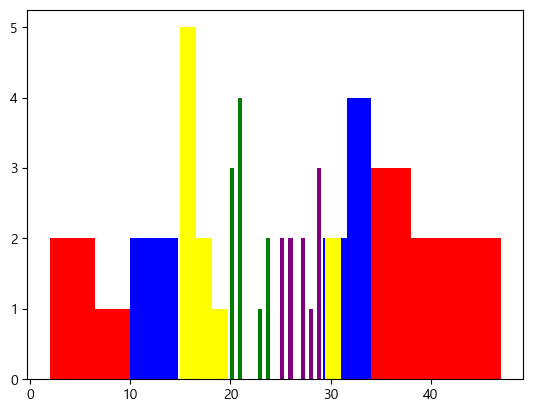

In [ ]:
plt.hist(df['A'], color ='RED')
plt.hist(df['B'], color ='BLUE')
plt.hist(df['C'], color ='YELLOW')
plt.hist(df['D'], color ='PURPLE')
plt.hist(df['E'], color ='GREEN')

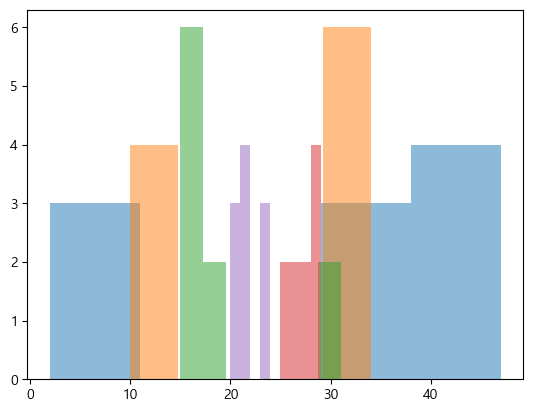

In [ ]:
for col in df.columns:
    plt.hist(df[col],bins='auto', alpha =0.5)    

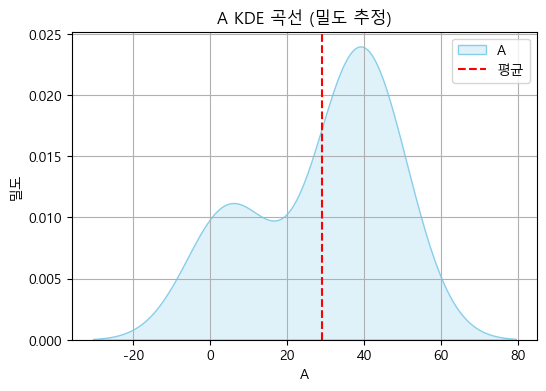

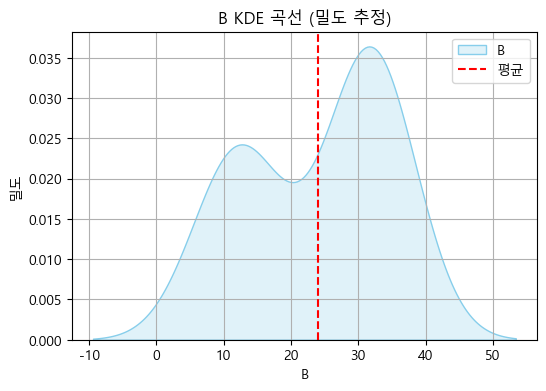

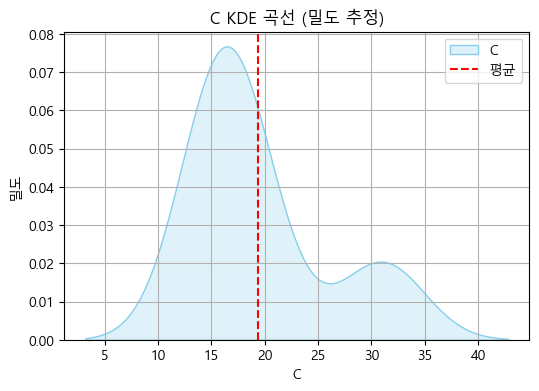

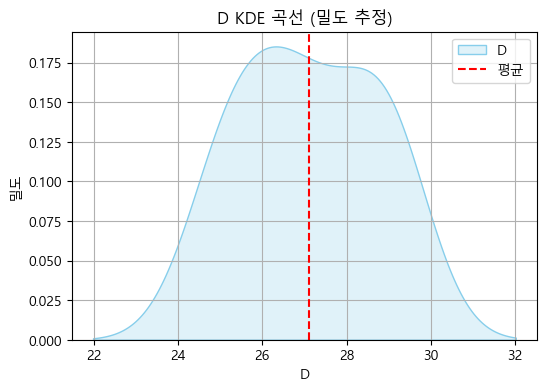

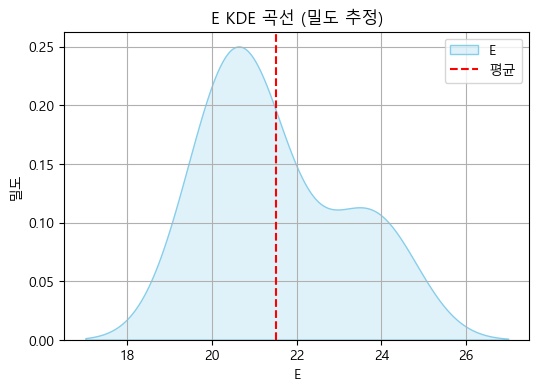

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[col], fill=True, color='skyblue', label=col)
    plt.axvline(df[col].mean(), color='red', linestyle='--', label='평균')
    plt.title(f"{col} KDE 곡선 (밀도 추정)")
    plt.xlabel(col)
    plt.ylabel("밀도")
    plt.legend()
    plt.grid(True)
    plt.show()


첨도와 왜도


In [106]:
from scipy.stats import kurtosis

kurtosis_value = kurtosis(data)
print(kurtosis_value)

[-1.20858977 -1.72253932  0.04612341 -1.44440419 -1.05185185]


In [110]:
kurtosis_value = kurtosis(df)
print(kurtosis_value)

[-1.20858977 -1.72253932  0.04612341 -1.44440419 -1.05185185]


In [115]:
from scipy.stats import skew, kurtosis

print("📊 각 컬럼의 왜도(Skewness)와 첨도(Kurtosis):\n")

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):  # 숫자형 컬럼만 대상
        col_skew = skew(df[col])
        col_kurt = kurtosis(df[col])  # fisher 방식: 정규분포면 0
        print(f"{col:<15} → 왜도: {col_skew:+.2f}, 첨도: {col_kurt:+.2f}")

📊 각 컬럼의 왜도(Skewness)와 첨도(Kurtosis):

A               → 왜도: -0.72, 첨도: -1.21
B               → 왜도: -0.41, 첨도: -1.72
C               → 왜도: +1.36, 첨도: +0.05
D               → 왜도: +0.00, 첨도: -1.44
E               → 왜도: +0.71, 첨도: -1.05


첨도
양의 첨도 0이상이다 -> 평균에 분포하고 있는 값의 양이 많다 (양의 첨도) 변동성이 적다
음의 첨도 0이하이다 -> 평균에 분포하고 있는 값의 양이 적다 (음의 첨도) 변동성이 크다

첨도 > 3  
첨도 < 3 

왜도(SKEWNESS)

왜도
양의 왜도 -> 최빈값(Mode) < 중앙값(Median) < 평균(Mean)
음의 왜도 -> 평균(Mean) < 중앙값(Median) < 최빈값(Mode)

In [116]:
from scipy.stats import skew

data = [10, 20, 30, 40, 100]  # 오른쪽으로 치우친 데이터
skew_value = skew(data)
print(skew_value)  # 양수 (오른쪽 꼬리)

1.1384199576606167


양의 왜도에서 대부분 데이터가 왼쪽에 집중되어 있고 오른쪽으로 꼬리가 길게 뻗어 있다. 이러한 분포에서는 일반적으로 다음과 같은 관계가 성립한다
최빈값(Mode) < 중앙값(Median) < 평균(Mean) [ex) 집값 그래프]

반대로 음의 왜도에서는 데이터가 주로 오른쪽에 집중되어 있고 왼쪽으로 꼬리가 길게 뻗어 있다. 
평균(Mean) < 중앙값(Median) < 최빈값(Mode) [ex) 제조업 불량률 그래프]